# Product Reviews Analysis

## Initial EDA and Text Preprocessing - NLP

## Step 1: Read in Data

In [648]:
from collections import OrderedDict
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer

In [649]:
product_df = pd.read_csv('ProductReviews-Unsupervised.csv')
product_df.shape
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

In [650]:
product_df.dropna(subset=['reviews.title','reviews.text','name','reviews.rating'], inplace=True)
product_df.shape

(70535, 25)

In [651]:
product_df['name'].value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total          8597
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital)               5510
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)           3609
Tide Original Liquid Laundry Detergent - 100 Oz                    3488
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd    3329
                                                                   ... 
Black Radiance Artisan Color Baked Blush, Warm Berry                  1
Hubba Bubba Bubble Tape - 2pk                                         1
Noosa Honey Yogurt                                                    1
Lundberg Long Grain Brown Organic Rice, 16oz                          1
NYX Doll Eye Mascara, Waterproof - Black                              1
Name: name, Length: 556, dtype: int64

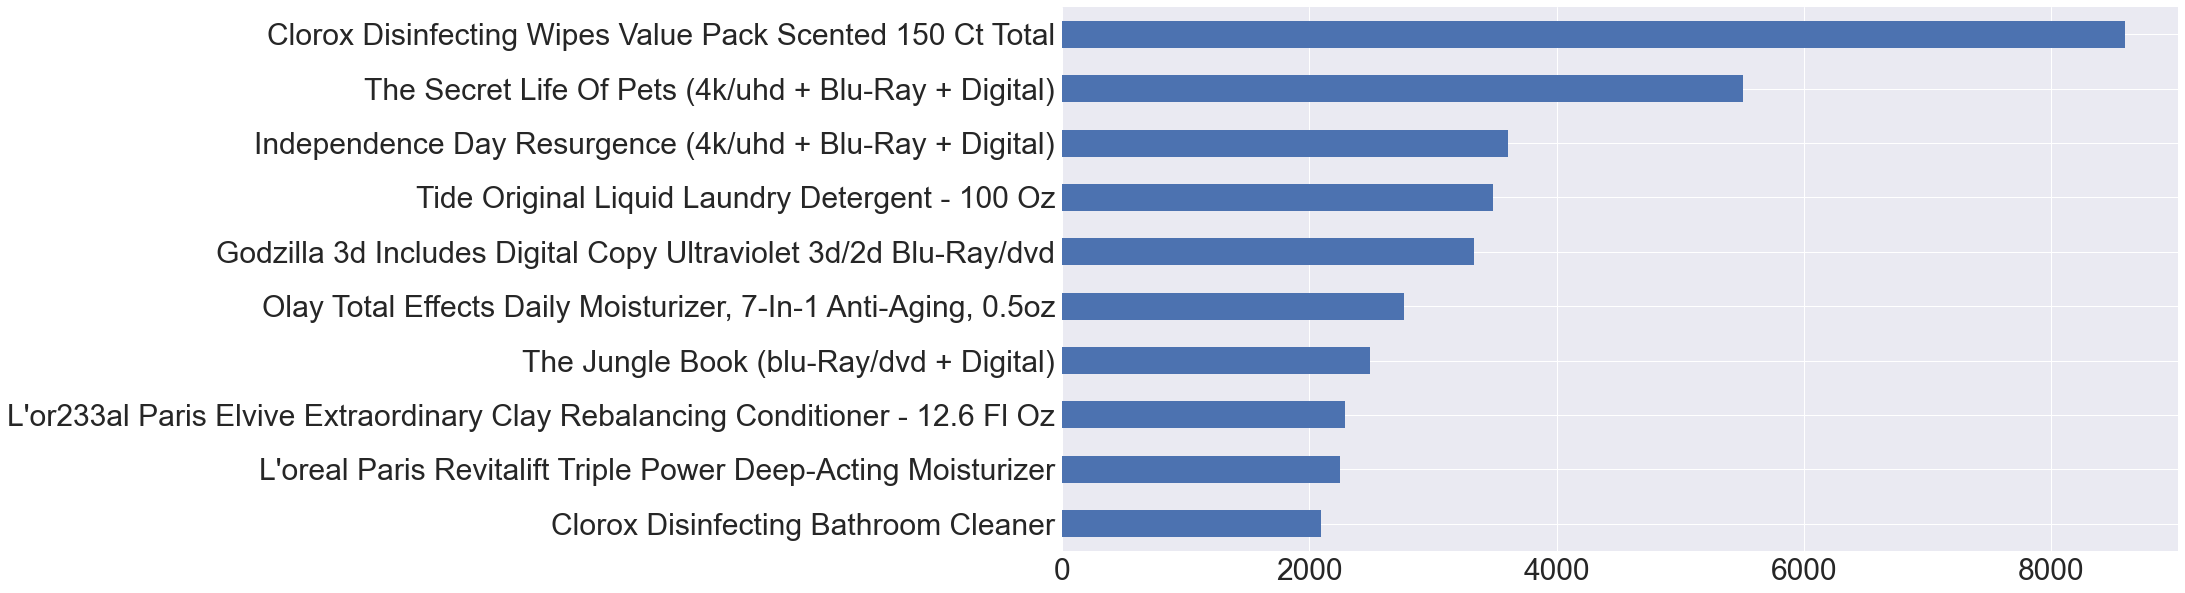

In [652]:
product_df['name'].value_counts()[0:10].plot(kind='barh', figsize=[20,10], fontsize=30).invert_yaxis()

In [653]:
product_df.head(3)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.03E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.03E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/s/product/29775278,Good flavor. This was collected as part of a ...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/s/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391


In [654]:
product_df['brand'].value_counts()

Clorox                  10690
Universal Home Video     6178
Tide                     5373
FOX                      4498
Disney                   3689
                        ...  
Stonyfield                  1
Black Radiance              1
Cal Lighting                1
Sebastian                   1
Dremel                      1
Name: brand, Length: 361, dtype: int64

In [655]:
product_df.head(3)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.03E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.03E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/s/product/29775278,Good flavor. This was collected as part of a ...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/s/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391


In [656]:
product_df = product_df[['reviews.text','reviews.title','reviews.rating','name','categories']]

In [657]:
product_df['reviews.rating'].value_counts()

5    46212
4    14523
3     4311
1     3676
2     1813
Name: reviews.rating, dtype: int64

In [658]:
product_df = product_df[product_df['reviews.rating'] !=3]

In [659]:
product_df.shape

(66224, 5)

In [660]:
product_df['sentiment'] = np.where(product_df['reviews.rating'] >= 4, 'positive', 'negative')

In [661]:
product_df.sentiment.value_counts(normalize=True)

positive    0.917115
negative    0.082885
Name: sentiment, dtype: float64

In [662]:
product_df['reviewsConcat'] = product_df['reviews.title'] + ' ' + product_df['reviews.text']

In [663]:
product_df.shape

(66224, 7)

In [664]:
product_df['reviewsConcat']

0        Just Awesome i love this album. it's very good...
1        Good Good flavor. This  was collected as part ...
2                                        Good Good flavor.
3        Disappointed I read through the s on here befo...
4        Irritation My husband bought this gel for us. ...
                               ...                        
71039    Solves the problem I'm dealing with dry eyes a...
71040    Great stuff! Great stuff! Helps keep my contac...
71041                                      My  Right price
71042    Wonderful Product I was so pleased when this s...
71043    Makes The Holidays Better Excellent album, mak...
Name: reviewsConcat, Length: 66224, dtype: object

## Text Preprocessing

In [665]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_stop_words = lambda x: [item for item in x if item not in stopwords.words('english')]

product_df['reviews_clean'] = product_df['reviewsConcat'].map(alphanumeric).map(punc_lower) #.apply(word_tokenize).apply(remove_stop_words)
# product_df['reviews_clean'] = product_df['reviewsConcat'].map(alphanumeric).map(punc_lower).apply(word_tokenize).map(remove_stop_words)
# Apply word tokenizer
# tokenized_text = punc_lower.apply(word_tokenize)

# product_df['key_words'] =product_df['tokenized_text'].apply(lambda x: [item for item in x if item not in stopwords.words('english')])

# product_df.head(3)

<>:1: DeprecationWarning: invalid escape sequence \w
<>:1: DeprecationWarning: invalid escape sequence \w
C:\Users\vyasc\AppData\Local\Temp/ipykernel_23004/3374901212.py:1: DeprecationWarning: invalid escape sequence \w
  alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)


In [666]:
product_df['reviewsConcat']

0        Just Awesome i love this album. it's very good...
1        Good Good flavor. This  was collected as part ...
2                                        Good Good flavor.
3        Disappointed I read through the s on here befo...
4        Irritation My husband bought this gel for us. ...
                               ...                        
71039    Solves the problem I'm dealing with dry eyes a...
71040    Great stuff! Great stuff! Helps keep my contac...
71041                                      My  Right price
71042    Wonderful Product I was so pleased when this s...
71043    Makes The Holidays Better Excellent album, mak...
Name: reviewsConcat, Length: 66224, dtype: object

In [667]:
product_df['reviews_keywords'] = product_df['reviews_clean'].map(np.unique)

In [668]:
product_df['reviews_clean']

0        just awesome i love this album  it s very good...
1        good good flavor  this  was collected as part ...
2                                        good good flavor 
3        disappointed i read through the s on here befo...
4        irritation my husband bought this gel for us  ...
                               ...                        
71039    solves the problem i m dealing with dry eyes a...
71040    great stuff  great stuff  helps keep my contac...
71041                                      my  right price
71042    wonderful product i was so pleased when this s...
71043    makes the holidays better excellent album  mak...
Name: reviews_clean, Length: 66224, dtype: object

In [669]:
product_df['reviews_keywords']

0        [just awesome i love this album  it s very goo...
1        [good good flavor  this  was collected as part...
2                                      [good good flavor ]
3        [disappointed i read through the s on here bef...
4        [irritation my husband bought this gel for us ...
                               ...                        
71039    [solves the problem i m dealing with dry eyes ...
71040    [great stuff  great stuff  helps keep my conta...
71041                                    [my  right price]
71042    [wonderful product i was so pleased when this ...
71043    [makes the holidays better excellent album  ma...
Name: reviews_keywords, Length: 66224, dtype: object

In [670]:
remove_words = ['review', 'reviews']

In [671]:
# pat = '|'.join([r'\b{}\b'.format(w) for w in remove_words])

# product_df.assign(new=product_df['reviews_keywords'].replace(dict(string={pat: ''}), regex=True))


In [672]:
product_df.head(3)

,reviews.text,reviews.title,reviews.rating,name,categories,sentiment,reviewsConcat,reviews_clean,reviews_keywords
0,i love this album. it's very good. more to the...,Just Awesome,5,Pink Friday: Roman Reloaded Re-Up (w/dvd),"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",positive,Just Awesome i love this album. it's very good...,just awesome i love this album it s very good...,[just awesome i love this album it s very goo...
1,Good flavor. This was collected as part of a ...,Good,5,Lundberg Organic Cinnamon Toast Rice Cakes,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",positive,Good Good flavor. This was collected as part ...,good good flavor this was collected as part ...,[good good flavor this was collected as part...
2,Good flavor.,Good,5,Lundberg Organic Cinnamon Toast Rice Cakes,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",positive,Good Good flavor.,good good flavor,[good good flavor ]


In [673]:
product_reviews_df = product_df[['reviews.rating','sentiment','reviews_keywords','reviewsConcat','name','reviews.title','categories']]

In [674]:
product_reviews_df.shape

(66224, 7)

In [675]:
product_reviews_df.head(2)

,reviews.rating,sentiment,reviews_keywords,reviewsConcat,name,reviews.title,categories
0,5,positive,[just awesome i love this album it s very goo...,Just Awesome i love this album. it's very good...,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome,"Movies, Music & Books,Music,R&b,Movies & TV,Mo..."
1,5,positive,[good good flavor this was collected as part...,Good Good flavor. This was collected as part ...,Lundberg Organic Cinnamon Toast Rice Cakes,Good,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co..."


In [676]:
product_reviews_df.to_csv(r'product_reviews_cleaned.csv')

In [677]:
product_df['reviews.text'].value_counts()

Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                       26
Great                                                                                                                                                                                                                                                                                                                                                                                                                                                                      25
good                                                                        

In [678]:
X=product_df['reviews_keywords']
y=product_df['sentiment']

In [679]:
docs = product_df['reviewsConcat']
# docs = new_cleaning_product_df['reviewsConcat']

In [680]:
vec = CountVectorizer()

In [681]:
doc_term = vec.fit_transform(docs)

# doc_term.toarray()
# pd.unique(doc_term.toarray().reshape(-1))

In [682]:
vec.vocabulary_

{'just': 13426,
 'awesome': 2230,
 'love': 14508,
 'this': 24735,
 'album': 1274,
 'it': 13085,
 'very': 26409,
 'good': 10785,
 'more': 15818,
 'to': 25012,
 'the': 24590,
 'hip': 11821,
 'hop': 11961,
 'side': 22123,
 'than': 24569,
 'her': 11702,
 'current': 6159,
 'pop': 18417,
 'sound': 22814,
 'so': 22625,
 'hype': 12210,
 'listen': 14286,
 'everyday': 8710,
 'at': 2023,
 'gym': 11259,
 'give': 10592,
 '5star': 489,
 'rating': 19549,
 'all': 1323,
 'way': 26864,
 'metaphors': 15276,
 'are': 1841,
 'crazy': 5905,
 'flavor': 9655,
 'was': 26772,
 'collected': 4981,
 'as': 1931,
 'part': 17557,
 'of': 16773,
 'promotion': 18973,
 'disappointed': 7184,
 'read': 19603,
 'through': 24804,
 'on': 16912,
 'here': 11707,
 'before': 2649,
 'looking': 14435,
 'in': 12454,
 'buying': 3736,
 'one': 16923,
 'couples': 5780,
 'lubricants': 14587,
 'and': 1525,
 'ultimately': 25674,
 'that': 24585,
 'didn': 6992,
 'even': 8674,
 'live': 14320,
 'up': 26071,
 'had': 11273,
 'for': 9863,
 'starter

In [683]:
doc_term.shape

(66224, 27769)

In [684]:
product_df.shape

(66224, 9)

In [685]:
vec = CountVectorizer(binary=True)

In [686]:
doc_term = vec.fit_transform(docs)

# doc_term.toarray()

In [687]:
# pd.unique(doc_term.toarray().reshape(-1))

In [688]:
vec = TfidfVectorizer()

In [689]:
doc_term = vec.fit_transform(docs.values)

# doc_term.toarray()

In [690]:
doc_term.shape

(66224, 27769)

In [691]:
vec = CountVectorizer(stop_words='english',
                      max_df=0.8)

In [692]:
doc_term = vec.fit_transform(docs)

# doc_term.toarray()

In [693]:
'the' in vec.get_feature_names()

False

In [694]:
'is' in vec.get_feature_names()

False

In [695]:
doc_term.shape

(66224, 27468)

## Stemming


In [696]:
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

In [697]:
stemmer = SnowballStemmer("english")

In [698]:
def prep(word, stemmer=None):
    
    with open('./stop_words_english.txt', 'r', encoding='utf-8') as f:
        stopwords = [s.strip() for s in f.readlines()]
        
    if word.lower() in stopwords:
        return None
    
    elif stemmer is None:
        return word.lower()
    
    else:
        return stemmer.stem(word)

In [699]:
vec = CountVectorizer(stop_words='english',
                      min_df=1,  # This is default; this is just a reminder it exists
                      max_df=0.8,
                      preprocessor=prep)

# This could work, too, but *it will not clear stop words!*
# vec = CountVectorizer(min_df=1,  # This is default; this is just a reminder it exists
#                       max_df=0.8, preprocessor=stemmer.stem)

In [700]:
vec_stem = CountVectorizer(min_df=1,  # This is default; this is just a reminder it exists
                      max_df=0.8, preprocessor=stemmer.stem)

In [701]:
doc_term_2 = vec_stem.fit_transform(docs)
doc_term_2.shape

(66224, 28247)

In [702]:
doc_term = vec.fit_transform(docs)
doc_term.shape

(66224, 27468)

In [703]:
docs.shape

(66224,)

In [704]:
vec.get_feature_names()

['00',
 '000',
 '0000',
 '000x',
 '007',
 '04',
 '05',
 '06',
 '07',
 '079',
 '08',
 '09',
 '0layus',
 '0real',
 '0wjegesbxfiew',
 '10',
 '100',
 '1000',
 '10000000000',
 '1007',
 '100free',
 '100ml',
 '100oz',
 '100percent',
 '100s',
 '100x',
 '101',
 '102',
 '10280',
 '10281',
 '103',
 '104',
 '1040',
 '105',
 '107',
 '1080',
 '1080p',
 '1099s',
 '10am',
 '10c',
 '10days',
 '10dlls',
 '10hrs',
 '10i',
 '10ish',
 '10min',
 '10mo',
 '10mth',
 '10th',
 '10times',
 '10x',
 '10x14',
 '10xs',
 '10year',
 '10yr',
 '10yrs',
 '11',
 '110',
 '11196',
 '1124',
 '113',
 '11320',
 '1138',
 '11438',
 '1157620',
 '1183',
 '11th',
 '11x14',
 '11yr',
 '12',
 '120',
 '1200',
 '120mg',
 '122016',
 '123',
 '12443842',
 '1248',
 '125',
 '127201',
 '12hr',
 '12lbs',
 '12months',
 '12th',
 '12years',
 '12yr',
 '13',
 '130',
 '1300',
 '1329',
 '135lbs',
 '1375',
 '13x9',
 '13yrs',
 '14',
 '140',
 '145',
 '149',
 '15',
 '150',
 '1500',
 '1510',
 '1513',
 '154',
 '15mins',
 '15ml',
 '15oz',
 '16',
 '160',
 '1

In [705]:
# sklearn
from sklearn import datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [706]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [707]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10, preprocessor=stemmer.stem)
# dtm_tf = tf_vectorizer.fit_transform(docs)
# print(dtm_tf.shape)

In [708]:
type(docs)

pandas.core.series.Series

In [709]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(docs)
print(dtm_tfidf.shape)

C:\Users\vyasc\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "
C:\Users\vyasc\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti

(66224, 6023)


## NMF

In [710]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation

nmf = NMF(n_components=10)

nmf.fit(dtm_tfidf)

C:\Users\vyasc\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=10)

In [711]:
doc_topic_matrix = nmf.transform(dtm_tfidf)
doc_topic_matrix

array([[0.00158473, 0.00051257, 0.00239508, ..., 0.02154725, 0.        ,
        0.        ],
       [0.        , 0.02547006, 0.00636314, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00016085, 0.        , 0.00267481, ..., 0.00017126, 0.        ,
        0.        ],
       [0.00031063, 0.00107366, 0.00946512, ..., 0.01154125, 0.        ,
        0.00051072],
       [0.00276362, 0.        , 0.00741416, ..., 0.00138949, 0.        ,
        0.00042362]])

## Document / Topic Matrix

In [712]:
doc_topic_matrix_df  = pd.DataFrame(doc_topic_matrix).add_prefix('topic_')
doc_topic_matrix_df[['reviewsConcat','reviews_keywords']] = product_df[['reviewsConcat','reviews_keywords']]
# doc_topic_matrix_df[['raw_reviews', 'clean_reviews']] = df[['text', 'clean_english']]
doc_topic_matrix_df.head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,reviewsConcat,reviews_keywords
0,0.001585,0.000513,0.002395,0.021658,0.000316,0.006999,0.000000,0.021547,0.000000,0.000000,Just Awesome i love this album. it's very good...,[just awesome i love this album it s very goo...
1,0.000000,0.025470,0.006363,0.114984,0.000000,0.000000,0.008529,0.000000,0.000000,0.000000,Good Good flavor. This was collected as part ...,[good good flavor this was collected as part...
2,0.000000,0.000000,0.000000,0.124808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Good Good flavor.,[good good flavor ]
3,0.000710,0.005849,0.006269,0.000550,0.000000,0.015387,0.000228,0.000000,0.000000,0.000000,Disappointed I read through the s on here befo...,[disappointed i read through the s on here bef...
4,0.000995,0.000000,0.021579,0.000604,0.000000,0.002488,0.001355,0.000000,0.000150,0.000000,Irritation My husband bought this gel for us. ...,[irritation my husband bought this gel for us ...
5,0.002909,0.000000,0.009570,0.001856,0.003527,0.007866,0.003686,0.023558,0.000071,0.000000,Not worth it My boyfriend and I bought this to...,[not worth it my boyfriend and i bought this t...
6,0.001913,0.000000,0.013081,0.002740,0.001625,0.013975,0.005392,0.001657,0.000639,0.000000,Disappointing Bought this earlier today and wa...,[disappointing bought this earlier today and w...
7,0.001704,0.000000,0.015357,0.000000,0.001866,0.011936,0.011044,0.001257,0.003979,0.000000,Not happy at all I bought this product for my ...,[not happy at all i bought this product for my...
8,0.000342,0.000000,0.011783,0.002326,0.006827,0.010429,0.004093,0.001241,0.001503,0.014455,Very disappointing My husband and I bought thi...,[very disappointing my husband and i bought th...
9,0.001819,0.000000,0.005900,0.003863,0.001375,0.015795,0.001281,0.002236,0.000532,0.000000,Don't buy Got as a surprise for my husband the...,[don t buy got as a surprise for my husband th...


In [713]:
doc_topic_matrix_df.shape

(66224, 12)

## Word/Topic Matrix

In [714]:
vocab = tfidf_vectorizer.get_feature_names()
word_topic_matrix_df = pd.DataFrame(nmf.components_, columns=vocab).T.add_prefix('topic_')
word_topic_matrix_df.head(15)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
aaron,0.001193,0.000000,0.000019,0.000000,0.000000,0.000000,0.000000,0.001340,0.000000,0.000000
abilities,0.000502,0.001723,0.001058,0.001460,0.000157,0.001218,0.000000,0.000000,0.000000,0.000000
ability,0.000000,0.007611,0.005581,0.001632,0.004757,0.009742,0.000130,0.003827,0.000000,0.000000
able,0.015131,0.012455,0.055884,0.004048,0.007111,0.057430,0.058375,0.015229,0.001214,0.000000
abrasive,0.000000,0.000492,0.001281,0.000000,0.001031,0.000000,0.000438,0.002957,0.000000,0.000000
absolute,0.002163,0.004019,0.009888,0.000000,0.000000,0.005624,0.000747,0.009553,0.000000,0.000000
absolutely,0.065963,0.000000,0.055510,0.000000,0.000000,0.035015,0.094279,0.215394,0.021490,0.000000
absolutley,0.000000,0.001649,0.000000,0.001093,0.000000,0.000387,0.000554,0.003052,0.000000,0.000356
absolutly,0.000000,0.000394,0.000000,0.000000,0.000118,0.002640,0.001292,0.005470,0.000000,0.000000
absorb,0.000000,0.000000,0.020436,0.000000,0.000000,0.000000,0.001781,0.000000,0.000000,0.000000
